In [0]:
!pip install sklearn

In [0]:
import os
import pandas as pd
import numpy as np
import tarfile

from sklearn.metrics import roc_auc_score, roc_curve, f1_score, precision_score, recall_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
from sklearn.feature_extraction.text import CountVectorizer
from matplotlib import pyplot



In [0]:


def get_reviews(dir):
    reviews = []
    for file in os.listdir(dir):
        with open (dir + "/" + file, "r", encoding = "utf-8") as review_file:
            review = review_file.read()
            reviews += [review]
    return reviews


def make_df(dir):
    all_neg, all_pos = get_reviews(dir + '/neg'), get_reviews(dir + '/pos')
    neg_index = np.arange(len(all_neg))
    pos_index = np.arange(len(all_neg), len(all_neg) + len(all_pos))
    neg_series = pd.Series(all_neg, index = neg_index)
    pos_series = pd.Series(all_pos, index = pos_index)
    all_rev = pd.concat ([neg_series, pos_series])
    neg_values = pd.Series(0, index = neg_index)
    pos_values = pd.Series(1, index = pos_index)
    all_values = pd.concat ([neg_values, pos_values])
    df = pd.concat([all_rev, all_values], axis = 1)
    df.columns = ['review', 'value']
    return df


                   

In [4]:
from google.colab import files
uploaded = files.upload()

Saving aclImdb_v1.tar.gz to aclImdb_v1.tar.gz


In [0]:
tar = tarfile.open("aclImdb_v1.tar.gz", "r")
tar.extractall()

In [0]:
path_train = os.getcwd() + '/aclImdb/train'
path_test = os.getcwd() + '/aclImdb/train'
reviews_df_train = make_df(path_train)
reviews_df_test = make_df(path_test)

Функция оценки sklearn

In [0]:
def evaluation_f (true, pred):
  p = precision_score(true, pred)
  r = recall_score(true, pred)
  f1 = f1_score(true, pred)
  return p, r, f1

Используем countvectorizer для подготовки текстов отзывов, которые можно будет отдать на обучение моделям  в виде переменных X_test, X_train_counts. Переменная targ будет обозначать истинные значения тональности, которые мы пытаемся предсказать

In [0]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(reviews_df_train['review'])
X_test = count_vect.transform(reviews_df_test['review'])
targ = reviews_df_test['value']

Метод ближайшего соседа

In [0]:
clf1 = KNeighborsClassifier().fit(X_train_counts, reviews_df_train['value'])
predicted1 = clf1.predict(X_test)

<function matplotlib.pyplot.show>

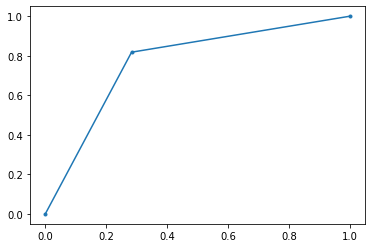

In [264]:
fpr, tpr, _ = roc_curve(targ, predicted1)
pyplot.plot(fpr, tpr, marker='.', label='Test')
pyplot.show

In [334]:
p, r, f1 = evaluation_f (targ, predicted1) 
print('P={}, R={}, F1={}'.format( p, r, f1))

P=0.7426475927674098, R=0.81816, F1=0.7785771382893685


Мультиномиальный наивный Байесовский классификатор

In [0]:
clf2 = MultinomialNB().fit(X_train_counts, reviews_df_train['value'])
predicted2 = clf2.predict(X_test)

<function matplotlib.pyplot.show>

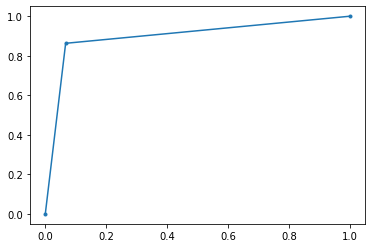

In [274]:
fpr, tpr, _ = roc_curve(targ, predicted2)
pyplot.plot(fpr, tpr, marker='.', label='Test')
pyplot.show

In [275]:
p, r, f1 = evaluation_f (targ, predicted2) 
print('P={}, R={}, F1={}'.format( p, r, f1))

P=0.9280860215053763, R=0.86312, F1=0.8944248704663212


In [276]:
print( my_evaluation_f(targ, predicted2))

(0.9280860215053763, 0.86312, 0.8944248704663212)


Логистическая регрессия

In [420]:
clf3 = LogisticRegression().fit(X_train_counts, reviews_df_train['value']) 
predicted3 = clf3.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


<function matplotlib.pyplot.show>

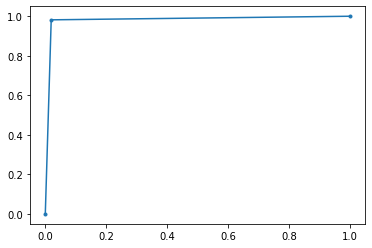

In [421]:
fpr, tpr, _ = roc_curve(targ, predicted3)
pyplot.plot(fpr, tpr, marker='.', label='Test')
pyplot.show

In [422]:
p, r, f1 = evaluation_f (targ, predicted3) 
print('P={}, R={}, F1={}'.format( p, r, f1))

P=0.9805848513902206, R=0.98184, F1=0.9812120243044453


Лучший результат показал метод на основе логистической регрессии

15 самых негативных и самых позитивных рецензий на основании модели, показавшей лучший результат

In [0]:
reviews_df_test['neg_pred'] = clf3.predict_proba(X_test)[:, 0]
reviews_df_test['pos_pred'] = clf3.predict_proba(X_test)[:, 1]

In [415]:
reviews_df_test.head()

,review,value,neg_pred,pos_pred
0,Moron and girlfriend conduct some ritual to resurrect th...,0,1.000000,2.920253e-07
1,The real irony is this: Joe Besser was a top notch comed...,0,0.873132,1.268682e-01
2,Remembering the dirty particulars of this insidiously va...,0,0.999921,7.892933e-05
3,This movie is actually worse than most movies I've ever ...,0,0.999494,5.058799e-04
4,Mr. VanHook took a good idea and kicked like a football....,0,0.978368,2.163167e-02


In [416]:
most_neg = reviews_df_test.sort_values(by='neg_pred', ascending=False)
most_neg.head(15)

,review,value,neg_pred,pos_pred
6799,"Sexo Cannibal, or Devil Hunter as it's more commonly kno...",0,1.0,6.733216e-22
491,The Tooth Fairy is set in a small town somewhere in Nort...,0,1.0,2.482357e-21
8673,Some have praised _Atlantis:_The_Lost_Empire_ as a Disne...,0,1.0,1.099888e-17
1187,I'm not sure what dragged me into the cinema to watch th...,0,1.0,1.941834e-18
11643,"The 1963 version of ""The Haunting"" has been one of my fa...",0,1.0,2.226924e-18
8635,"My god, what's going on? a Uwe Boll film and positive co...",0,1.0,9.591047e-21
9808,I watched SCARECROWS because of the buzz surrounding it....,0,1.0,4.151341e-18
1743,There are people out there who will greenlight anything!...,0,1.0,3.321817e-18
8211,Less than 10 minutes into this film I wanted it to end a...,0,1.0,2.175469e-18
8452,...though for a film that seems to be trying to market i...,0,1.0,4.184823e-17


In [417]:
most_pos = reviews_df_test.sort_values(by='pos_pred', ascending=False)
most_pos.head(15)

,review,value,neg_pred,pos_pred
14762,"What a wonderful, fanciful movie ""Stardust"" is.<br /><br...",1,0.0,1.0
18654,I approach films about talking animals with care. For ev...,1,0.0,1.0
19390,Match 1: Tag Team Table Match Bubba Ray and Spike Dudley...,1,0.0,1.0
24024,"Obsession comes in many flavors, and exists for a variet...",1,0.0,1.0
23554,First an explanation on what makes a great movie for me....,1,0.0,1.0
14769,Mukhsin is a beautiful movie about a first love story. E...,1,0.0,1.0
19918,Canadian director Vincenzo Natali took the art-house cir...,1,0.0,1.0
18655,By now you've probably heard a bit about the new Disney ...,1,0.0,1.0
21178,"Antonio Margheriti's ""Danza Macabra"" aka. ""Castle Of Blo...",1,0.0,1.0
21285,"Oftentimes, films of this nature come across as a mixed ...",1,0.0,1.0


Ниже можно почитать самые негативные и позитивные отзывы целиком

In [0]:
pd.set_option('display.max_colwidth', -1)

In [419]:
print((most_neg['review'].head(15)).to_string(index=False))

 Sexo Cannibal, or Devil Hunter as it's more commonly known amongst English speaking audiences, starts with actress & model Laura Crawford (Ursula Buchfellner as Ursula Fellner) checking out locations for her new film along with her assistant Jane (Gisela Hahn). After a long days work Laura is relaxing in the bath of her room when two very dubious character's named Chris (Werner Pochath) & Thomas (Antonio Mayans) burst in & kidnap her having been helped by the treacherous Jane. Laura's agent gets on the blower to rent-a-hero Peter Weston (Al Cliver) who is informed of the situation, the kidnappers have Laura on an isolated island & are demanding a 6 million ransom. Peter is told that he will be paid 200,000 to get her back safely & a further 10% of the 6 million if he brings that back as well, faster than a rat up a drain pipe Peter & his Vietnam Vet buddy helicopter pilot Jack are on the island & deciding on how to save Laura. So, the kidnappers have Laura & Peter has the 6 million bu

In [397]:
print((most_pos['review'].head(15)).to_string(index=False))

 First an explanation on what makes a great movie for me. Excitement about not knowing what is coming next will make me enjoy a movie the first time I watch it (case en point: Twister). There are also other things that go into a great first viewing such as good humor (John Candy in Uncle Buck and The Great Outdoors), good plot with good resolution (Madeline and Matilda), imaginative storytelling (all Star Wars episodes-George Lucas is THE MAN), and good music (again all Star Wars episodes, Wizard of Oz, Sound of Music). What makes me watch a movie at least six times in the theatre and buy a DVD or VHS tape? Characters. With that said, I present Cindy Lou Who and The Grinch. Excellent performance Taylor Momsen and Jim Carrey. The rest of the cast was very good, particularly Jeffery Tambor, Bill Irwin, Molly Shannon, Christine Baranski, and Josh Ryan Evans. But, every single scene with Cindy and The Grinch-together is excellent and very funny and/or heartwarming. Cindy Lou is my favorite

Моя функция оценки

Напишем общий шаблон для функций  true positive, false positive, true negative, false negative. Назовем его counter




In [0]:
def counter(true, pred, true_value, pred_value):
  tfpn = 0
  for i in range(len(predicted)):
          if (true[i] == true_value) and (pred[i] == pred_value):
            tfpn += 1
  return tfpn



Теперь непосредственно сами функции

In [0]:
def tp_f(true, pred):
  return counter(true, pred, 1, 1)


def fp_f(true, pred):
  return counter(true, pred, 0, 1)


def tn_f(true, pred):
  return counter(true, pred, 0, 0)


def fn_f(true, pred):
  return counter(true, pred, 1, 0)


Напишем функции для точности, полноты и ф-меры

In [0]:
def precision_f(true, pred):
  tp = tp_f(true, pred)
  fp = fp_f(true, pred)
  precision = tp/(tp+fp)
  return precision


def recall_f(true, pred):
  tp = tp_f(true, pred)
  fn = fn_f(true, pred)
  recall = tp/(tp+fn)
  return recall


def f_measure_f(true, pred):
  pr = precision_f(true, pred)
  r = recall_f(true, pred)
  f_measure = 2*pr*r/(pr+r)
  return f_measure


Общая функция оценки и ее проверка

In [427]:
def my_evaluation_f(true, pred):
  r = recall_f(true, pred)
  p = precision_f(true, pred)
  f1 = f_measure_f(true, pred)
  return p, r, f1


print( my_evaluation_f(targ, predicted1) == evaluation_f(targ, predicted1)) 
print( my_evaluation_f(targ, predicted2) == evaluation_f(targ, predicted2))
print( my_evaluation_f(targ, predicted3) == evaluation_f(targ, predicted3))

True
True
True


Какие значения показывают функции

In [426]:
print(my_evaluation_f(targ, predicted1))
print(evaluation_f(targ, predicted1)) 
print(my_evaluation_f(targ, predicted2))
print(evaluation_f(targ, predicted2)) 
print(my_evaluation_f(targ, predicted3))
print(evaluation_f(targ, predicted3)) 

(0.7426475927674098, 0.81816, 0.7785771382893685)
(0.7426475927674098, 0.81816, 0.7785771382893685)
(0.9280860215053763, 0.86312, 0.8944248704663212)
(0.9280860215053763, 0.86312, 0.8944248704663212)
(0.9805848513902206, 0.98184, 0.9812120243044453)
(0.9805848513902206, 0.98184, 0.9812120243044453)
